# Global sharks attacks



## Objetive


The objective is to answer to the following questions after having cleanned the data set:
- Has the month with more attacks changed since 1700? 
- Has the season with more attacks changed since 1700? 


## Import libraries

In [1]:
# Install library countryinfo to have more information about the countries:
#!pip install countryinfo

In [2]:
import pandas as pd
import numpy as np
import re
from countryinfo import CountryInfo

## Load the data

In [32]:
attacks = pd.read_csv('data/attacks.csv', encoding = "ISO-8859-1")

## Data cleaning

Check the columns: how many there are, if there is any duplicate, etc.

In [33]:
display(attacks.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Delete columns that won't be used: 
- Investigator or Source
- pdf, href, href formula
- original order
- Name
- Sex
- Age
- Activity
- Time
- Type
- Species

In [34]:
attacks.drop(columns=['Activity', 'Name', 'Sex ', 'Age', 'Time', 'Type', 'Species ', 'Investigator or Source', 
                      'pdf', 'href formula', 'href', 'original order'], inplace=True)

In [35]:
# Delete last 2 columns because they have no name and one is empty 
# and in the other one there is only one observation with data

attacks.drop(columns=['Unnamed: 23', 'Unnamed: 22'], inplace=True)

In [36]:
# Remove duplicates

attacks = attacks.drop_duplicates()

In [37]:
# Remove all the rows whose case number is 0:
attacks = attacks[attacks['Case Number']!= '0']

# Remove all the null values:
attacks = attacks[~attacks['Case Number'].isnull()]

# Remove the last line that contains NaN and the case number is xx:
attacks = attacks.head(-1)

In [38]:
# The three columns called Case Number contains the same information, so the last two will be removed:
attacks.drop(columns=['Case Number.1', 'Case Number.2'], inplace=True)

In [39]:
attacks.isnull().sum()

Case Number      0
Date             0
Year             2
Country         50
Area           455
Location       540
Injury          28
Fatal (Y/N)    539
dtype: int64

In [40]:
# Check what are the unique values of the column Year
pd.unique(attacks['Year'])

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [41]:
# In the rows were the year is 0, some values can be extracted from the date.
# I take the last year if there is more than two (i.e. between 2006 - 2009 -> year = 2009)

attacks.loc[attacks['Year']== 0,['Year']] = attacks[attacks['Year']== 0]['Date'].str.extract('([\d]{4}$)').astype('float')

# If the null has a year value in Date, extract is and replace it
attacks.loc[attacks['Year'].isnull(),'Year'] = attacks[attacks['Year'].isnull()]['Date'].str.extract('([\d]{4})').astype('float')

# Remove all the rows with nulls in the year
attacks = attacks[attacks['Year'].notna()]
# Years before 1700 AD won't be considered
attacks = attacks[attacks['Year'] >= 1700]

# Convert to interger all the year column
attacks['Year'] = attacks['Year'].astype(int)

## Create a month column

In [42]:
# Así no funciona, creo que es porque crea dos columnas con el resultado. No sé c¿omo hacer que solo haya una columna
#attacks['Month'] = attacks['Date'].str.extract('-([\w]+?)-|(^[a-zA-Z]{3})')

attacks['Month'] = attacks['Date'].str.extract('-([\w]+?)-')

In [43]:
# La siguiente línea debería extraer los meses de la columna Date para los valores donde Month es nulo,
# pero parece que no hace nada, pero la parte de la derecha sola si que filtra correctamente
attacks.loc[attacks['Month'].isnull(), 'Month'] = attacks[attacks['Month'].isnull()]['Date'].str.extract('(^[a-zA-Z]{3})')

In [44]:
#Correct July, Ap, March and Sept months' name to 3 letters strings:
attacks['Month'] = np.where(attacks['Month']=='July', 'Jul', 
                            np.where(attacks['Month']=='Ap', 'Apr', 
                                     np.where(attacks['Month']=='March', 'Mar', 
                                              np.where(attacks['Month']=='Sept', 'Sep', attacks['Month']))))
# Convert months names to numbers
look_up = { 'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,'Jun':6, 
           'Jul': 7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

attacks['Month'] = attacks['Month'].apply(lambda x: look_up[x] if x in look_up else x)

In [45]:
attacks[attacks['Month'].isnull()]

,Case Number,Date,Year,Country,Area,Location,Injury,Fatal (Y/N),Month
14,2018.05.00,May 2018,2018,AUSTRALIA,Westerm Australia,Dugong Bay,Shallow lacerations to finger PROVOKED INCIDENT,N,NaN
86,2017.09.14,Sep-2017,2017,AUSTRALIA,Westerm Australia,Esperance,"sharks rammed boats, no injury to occupants",N,NaN
131,2017.06.05,2017.06.05,2017,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Injuries to hand and wrist,N,NaN
226,2016.09.00,Sep-2016,2016,MEXICO,NaN,Guadalupe Island,"No injury to divers, white shark breached cage",NaN,NaN
370,2015.09.00,Sep-2015,2015,FIJI,NaN,NaN,Leg bitten,N,NaN
...,...,...,...,...,...,...,...,...,...
6158,1723.00.00,1723,1723,ROATAN,NaN,NaN,Struck on thigh,NaN,NaN
6159,1721.06.00,June 1721,1721,ITALY,Sardinia,"Ponte della Maddelena,","FATAL, partial remains recovered from sharks...",Y,NaN
6161,1700.00.00.c,1700s,1700,FRANCE,NaN,Nice,FATAL,Y,NaN
6162,1700.00.00.b,1700s,1700,FRANCE,Côte d'Azur,Antibes,Leg severed,N,NaN


In [46]:
# Drop nulls values
attacks = attacks[attacks['Month'].notna()]

In [47]:
# Convert all the values to integers
attacks['Month'] = attacks['Month'].astype('int')

There are some months that in fact they are days, so we need to correct them:

In [48]:
pd.unique(attacks['Month'])

array([ 6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8,  7, 30, 26, 24, 17, 13,
       28])

In [49]:
# Here we can see the month each of these 6 rows should have had
attacks[attacks['Month'] >12]

,Case Number,Date,Year,Country,Area,Location,Injury,Fatal (Y/N),Month
3048,1980.12.30,12-30-1980,1980,SOUTH AFRICA,Eastern Cape Province,Nahoon,"No injury, paddleski bitten",N,30
5701,1890.06.26,06-26-1890,1890,CROATIA,NaN,Fiume,Legs severed,N,26
6125,1806.04.24,Aug-24-1806,1896,USA,NaN,NaN,Shark scavenged on the dead sailors,NaN,24
6128,1803.05.17,May-17-1803,1803,USA,South Carolina,Off Charleston,No injury,N,17
6130,1802.04.13.R,Reported Apr-13-1802,1802,INDIA,NaN,NaN,FATAL,Y,13
6133,1797.05.28.R,Reported May-28-1797,1797,NaN,NaN,NaN,FATAL,Y,28


In [50]:
attacks.loc[attacks['Month'] == 30,'Month'] = 12
attacks.loc[attacks['Month'] == 26,'Month'] = 6
attacks.loc[attacks['Month'] == 24,'Month'] = 8
attacks.loc[attacks['Month'] == 17,'Month'] = 5
attacks.loc[attacks['Month'] == 13,'Month'] = 4

## Clean countries' column

In [51]:
pd.unique(attacks['Country'])

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES',
       'INDONESIA', 'FRENCH POLYNESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'Fiji', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN', 'GREECE',
       'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA', 'FIJI',
       'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'UNITE

In [53]:
attacks[attacks['Country']=='MALAYSIAAS']

,Case Number,Date,Year,Country,Area,Location,Injury,Fatal (Y/N),Month


In [54]:
attacks[attacks['Case Number']=='1958.09.13']

,Case Number,Date,Year,Country,Area,Location,Injury,Fatal (Y/N),Month
4140,1958.09.13,13-Sep-1958,1958,ANDAMAN / NICOBAR ISLANDAS,NaN,NaN,"FATAL, leg bitten",Y,9


Drop all the rows where the columns Country, Area and Location are nulls

In [55]:
attacks.dropna(how='all', subset=['Country','Area','Location'], inplace=True)

Fill all the NaN in the Location and Area columns

In [56]:
attacks['Area'].fillna(value='Not applicable', inplace=True)
attacks['Location'].fillna(value='Not applicable', inplace=True)

In [57]:
attacks.loc[attacks['Area'].str.contains('St Helena') ,'Country'] = 'SAINT HELENA'
attacks.loc[attacks['Area'].str.contains('Sri Lanka') ,'Country'] = 'SRI LANKA'
attacks.loc[attacks['Area'].str.contains('California|American|Hawaii|Bermuda') ,'Country'] = 'USA'
attacks.loc[attacks['Area'].str.contains('English Channel') ,'Country'] = 'UK'
attacks.loc[attacks['Area'].str.contains('Okinawa|Japan') ,'Country'] = 'JAPAN'
attacks.loc[attacks['Area'].str.contains('Madagascar|Virgin Islands') ,'Country'] = 'MADAGASCAR'
attacks.loc[attacks['Area'].str.contains('Andaman|BENGAL') ,'Country'] = 'INDIA'
attacks.loc[attacks['Area'].str.contains('[fF]iji') ,'Country'] = 'FIJI'
attacks.loc[attacks['Area'].str.contains('NETHERLANDS ANTILLES|Curacao') ,'Country'] = 'VENEZUELA'
attacks.loc[attacks['Area'].str.contains('Papua') ,'Country'] = 'PAPUA NEW GUINEA'
attacks.loc[attacks['Area'].str.contains('Ecuador') ,'Country'] = 'ECUADOR'
attacks.loc[attacks['Area'].str.contains('Wake Island') ,'Country'] = 'PHILIPPINES'
attacks.loc[attacks['Area'].str.contains('Mediterranean|MEDITERRANEAN') ,'Country'] = 'GREECE'
attacks.loc[attacks['Area'].str.contains('Australia|Sydney|Colombo|Western Banks') ,'Country'] = 'AUSTRALIA'
attacks.loc[attacks['Area'].str.contains('South Africa') ,'Country'] = 'SOUTH AFRICA'
attacks.loc[attacks['Area'].str.contains('Java') ,'Country'] = 'INDONESIA'
attacks.loc[attacks['Location'].str.contains('Costa Rica') ,'Country'] = 'COSTA RICA'
attacks.loc[attacks['Location'].str.contains('Florida Strait') ,'Country'] = 'CUBA'
attacks.loc[attacks['Location'].str.contains('Nevis') ,'Country'] = 'Saint Kitts and Nevis'
attacks.loc[attacks['Location'].str.contains('Cape Town') ,'Country'] = 'SOUTH AFRICA'
attacks.loc[attacks['Location'].str.contains('Hong Kong') ,'Country'] = 'HONG KONG'
attacks.loc[attacks['Location'].str.contains('Carlisle Bay') ,'Country'] = 'DOMINICA'
attacks.loc[attacks['Location'].str.contains('Santa Cruz') ,'Country'] = 'SPAIN'
attacks.loc[attacks['Location'].str.contains('Île Saint-Paul') ,'Country'] = 'AUSTRALIA'
attacks.loc[attacks['Location'].str.contains('Venezuela') ,'Country'] = 'VENEZUELA'
attacks.loc[attacks['Location'].str.contains('Honolulu|America|New York|Bermuda') ,'Country'] = 'USA'

In [58]:
attacks[attacks['Country'].isnull()]

,Case Number,Date,Year,Country,Area,Location,Injury,Fatal (Y/N),Month
5425,1909.01.17,17-Jan-1909,1909,NaN,Not applicable,Near the equator,FATAL,NaN,1


There is still one null in the country column. Probably reading the PDF file we could figure out where the attack happened, but for now I decide to skip it.

In [59]:
attacks = attacks[attacks['Country'].notna()]

1) Remove parenthesis and /

2) Sustitue all names of the countries for names inside the CountryInfo library

In [60]:
attacks['Country'] = attacks['Country'].str.replace('/ [\w]+.|\?','')
attacks['Country'] = attacks['Country'].str.replace('^\s|\s+$','')
attacks['Country'] = attacks['Country'].str.replace('ENGLAND|SCOTLAND|BRITISH.+ISLANDS|BRITISH ISLES','UK')
attacks['Country'] = attacks['Country'].str.replace('^BAHAMAS','THE BAHAMAS')
attacks['Country'] = attacks['Country'].str.replace('COLUMBIA','COLOMBIA')
attacks['Country'] = attacks['Country'].str.replace('OKINAWA','JAPAN')
attacks['Country'] = attacks['Country'].str.replace('AZORES','PORTUGAL')
attacks['Country'] = attacks['Country'].str.replace('^ATLANTIC OCEAN$','NORTH ATLANTIC OCEAN')
attacks['Country'] = attacks['Country'].str.replace('CARIBBEAN SEA|ANTIGUA|NEVIS|ST. MA*RTIN','ANGUILLA')
attacks['Country'] = attacks['Country'].str.replace('GRAND CAYMAN','CAYMAN ISLANDS')
attacks['Country'] = attacks['Country'].str.replace('^MICRONESIA','FEDERATED STATES OF MICRONESIA')
attacks['Country'] = attacks['Country'].str.replace('BRITISH WEST INDIES|Coast of AFRICA','PUERTO RICO')
attacks['Country'] = attacks['Country'].str.replace('BRITISH NEW GUINEA|NEW BRITAIN|^NEW GUINEA|ADMIRALTY ISLANDS', 'PAPUA NEW GUINEA')
attacks['Country'] = attacks['Country'].str.replace('JOHNSTON ISLAND', 'USA') #It is next to Hawaii -> USA
attacks['Country'] = attacks['Country'].str.replace('PERSIAN GULF', 'UNITED ARAB EMIRATES') 
attacks['Country'] = attacks['Country'].str.replace('ANDAMAN.*', 'MALAYSIA') 
attacks['Country'] = attacks['Country'].str.replace('THE BALKANS', 'SLOVENIA') 
attacks['Country'] = attacks['Country'].str.replace('CURACAO', 'VENEZUELA')  

Complete the null values for country column using the location and area columns and drop the rest

In [61]:
attacks['Country'] = attacks['Country'].str.replace('Mediterranean.*?|MEDITERRANEAN.*?|CRETE', 'GREECE') 
attacks['Country'] = attacks['Country'].str.replace('BURMA', 'BANGLADESH')
attacks['Country'] = attacks['Country'].str.replace('CEYLON', 'SRI LANKA')
attacks['Country'] = attacks['Country'].str.replace('BAY OF BENGAL', 'INDIA')
attacks['Country'] = attacks['Country'].str.replace('MID-PACIFC OCEAN', 'SOUTH PACIFIC OCEAN')
attacks['Country'] = attacks['Country'].str.replace('TASMAN SEA', 'NEW ZEALAND')
attacks['Country'] = attacks['Country'].str.replace('CENTRAL PACIFIC', 'SOUTH PACIFIC')
attacks['Country'] = attacks['Country'].str.replace('WESTERN SAMOA', 'SAMOA')
attacks['Country'] = attacks['Country'].str.replace('GULF OF ADEN', 'SOMALIA')
attacks['Country'] = attacks['Country'].str.replace('MONTENEGRO', 'CROATIA')
attacks['Country'] = attacks['Country'].str.replace('TURKS \& CAICOS|SAN DOMINGO', 'HAITI')
attacks['Country'] = attacks['Country'].str.replace('PALESTINIAN TERRITORIES', 'ISRAEL')
attacks['Country'] = attacks['Country'].str.replace('DIEGO GARCIA', 'MALDIVES')
attacks['Country'] = attacks['Country'].str.replace('TRINIDAD \& TOBAGO|TOBAGO|VENEZUELA|WEST INDIES', 'VENEZUELA')
attacks['Country'] = attacks['Country'].str.replace('ST HELENA, British overseas territory', 'SAINT HELENA')
attacks['Country'] = attacks['Country'].str.replace('RED SEA', 'EGYPT')
attacks['Country'] = attacks['Country'].str.replace('UNITED ARAB EMIRATES \(UAE\)', 'UNITED ARAB EMIRATES')

Drop the locations called: 
- 'PACIFIC OCEAN', not clear if North or South hemisphere
- AFRICA

Probably looking at the pdf I could obtain the location, but for now I skip it

In [62]:
attacks = attacks[attacks['Country'] != 'PACIFIC OCEAN']
attacks = attacks[attacks['Country'] != 'AFRICA']

## Create a column called Hemisphere and indicate if the attack was in the North or South hemisphere

Define a function to find out if a country belongs to the North or South hemisphere

In [63]:
def hemisphere(country):
    if 'NORTH' in country or 'SOUTH CHINA SEA' in country:
        return 'North'
    elif 'SOUTH' in country or 'INDIAN OCEAN' in country:
        return 'South'
    elif CountryInfo(country).latlng()[0] >= 0:
        return 'North'
    else:
        return 'South'

In [64]:
# Very slow function (~4min) - To find if there is a faster way to do this operation
attacks['Hemisphere'] = attacks['Country'].apply(hemisphere)

In [65]:
attacks[attacks['Hemisphere'] =='North']['Year'].value_counts()

2017    89
2015    85
2013    81
2016    79
2014    78
        ..
1873     1
1877     1
1751     1
1882     1
1738     1
Name: Year, Length: 202, dtype: int64

In [66]:
attacks[attacks['Hemisphere'] =='South']['Year'].value_counts()

2015    56
2011    55
2009    55
2016    50
1962    48
        ..
1869     1
1871     1
1897     1
1917     1
1788     1
Name: Year, Length: 179, dtype: int64

## Create a column season

Define the months for each season and each hemisphere

In [102]:
n_seasons = {'Winter': [12, 1, 2],
             'Spring': [3, 4, 5], 
             'Summer': [6, 7, 8],
             'Autumn': [9, 10, 11]}

s_seasons = {'Winter': [6, 7, 8],
             'Spring': [9, 10, 11], 
             'Summer': [12, 1, 2],
             'Autumn': [3, 4, 5]}

Create the season column and fill it in depending the hemisphere and the month number

In [130]:
# I had defined at the beginning one function for both, but then I couldn't find a way
# to apply to the dataframe as I need values from two columns: Hemisphere and Month

def season_north(r):

    if r in n_seasons['Winter']:
        return 'Winter'
    elif r in n_seasons['Spring']:
        return 'Spring'
    elif r in n_seasons['Summer']:
        return 'Summer'
    else:
        return 'Autumn'

def season_south(r):
    if r in s_seasons['Winter']:
        return 'Winter'
    elif r in s_seasons['Spring']:
        return 'Spring'
    elif r in s_seasons['Summer']:
        return 'Summer'
    else:
        return 'Autumn'

In [122]:
# Empty column for season
attacks['Season'] = 'N'

In [128]:
attacks.loc[attacks['Hemisphere']=='North','Season'] = attacks[attacks['Hemisphere']=='North']['Month'].apply(season_north)
attacks.loc[attacks['Hemisphere']=='South','Season'] = attacks[attacks['Hemisphere']=='South']['Month'].apply(season_south)

In [129]:
attacks

,Case Number,Date,Year,Country,Area,Location,Injury,Fatal (Y/N),Month,Hemisphere,Season
0,2018.06.25,25-Jun-2018,2018,USA,California,"Oceanside, San Diego County","No injury to occupant, outrigger canoe and pad...",N,6,North,Summer
1,2018.06.18,18-Jun-2018,2018,USA,Georgia,"St. Simon Island, Glynn County",Minor injury to left thigh,N,6,North,Summer
2,2018.06.09,09-Jun-2018,2018,USA,Hawaii,"Habush, Oahu",Injury to left lower leg from surfboard skeg,N,6,North,Summer
3,2018.06.08,08-Jun-2018,2018,AUSTRALIA,New South Wales,Arrawarra Headland,Minor injury to lower leg,N,6,South,Winter
4,2018.06.04,04-Jun-2018,2018,MEXICO,Colima,La Ticla,Lacerations to leg & hand shark PROVOKED INCIDENT,N,6,North,Summer
...,...,...,...,...,...,...,...,...,...,...,...
6150,1753.10.27.R,Reported 27-Oct-1753,1753,JAMAICA,Not applicable,Kingston Harbor,FATAL,Y,10,North,Autumn
6151,1751.07.27,27-Jul-1751,1751,USA,Massachusetts,Not applicable,FATAL,Y,7,North,Summer
6155,1742.12.17,17-Dec-1742,1742,DOMINICA,Not applicable,Carlisle Bay,FATAL,Y,12,North,Winter
6156,1738.04.06.R,Reported 06-Apr-1738,1738,ITALY,Sicily,Strait of Messina,FATAL,Y,4,North,Spring


## Create a column year_by_50
To group the time period in groups of 50 years

In [279]:
def group_year(y):
    if y <= 1800:
        return 1800
    for x in range(1850,2100,50):
        if y<=x:
            return x

In [287]:
attacks['year_by_50'] = attacks['Year'].apply(group_year)
attacks.groupby('year_by_50')['Hemisphere'].value_counts()

year_by_50  Hemisphere
1800        North           12
            South            2
1850        North           48
            South           20
1900        North          192
            South          174
1950        South          502
            North          386
2000        North         1128
            South          974
2050        North         1204
            South          728
Name: Hemisphere, dtype: int64

In [290]:
attacks.tail()

,Case Number,Date,Year,Country,Area,Location,Injury,Fatal (Y/N),Month,Hemisphere,Season,year_by_50
31,2018.04.10.R,Reported 10-Apr-2018,2018,BRAZIL,Alagoas,"Praia de Sauaçuhy, Maceió",Injury to ankle from marine animal trapped in ...,N,4,South,Autumn,2050
30,2018.04.14,14-Apr-2018,2018,THE BAHAMAS,New Providence,Nirvana Beach,No Injury. Shark swam away with the surf board,N,4,North,Spring,2050
29,2018.04.15.a,15-Apr-2018,2018,AUSTRALIA,Western Australia,"Cobblestones, Margaret River Area",Lacerations to legs,N,4,South,Autumn,2050
27,2018.04.15.c,15-Apr-2018,2018,BRAZIL,Pernambuco,Piedade,"Multiple severe injuries to arms and leg, leg ...",NaN,4,South,Autumn,2050
0,2018.06.25,25-Jun-2018,2018,USA,California,"Oceanside, San Diego County","No injury to occupant, outrigger canoe and pad...",N,6,North,Summer,2050


## Analysis

### Total values

Filtering first by season only, we can see that summer is when msot of the attacks are produced:

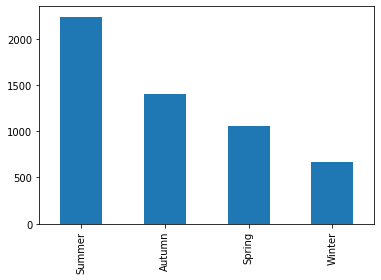

In [140]:
# Plot with the total number of attacks per season from year 1800
attacks.Season.value_counts().plot(kind='bar')

If we filter by season and hemisphere to check if the behaviour is the same in both places:

In [136]:
attacks.groupby('Season').Hemisphere.value_counts()

Season  Hemisphere
Autumn  North          818
        South          588
Spring  North          566
        South          492
Summer  North         1284
        South          957
Winter  South          363
        North          302
Name: Hemisphere, dtype: int64

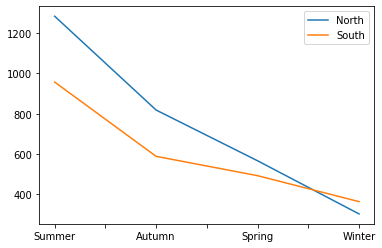

In [171]:
ax = attacks[attacks['Hemisphere']=='North'].Season.value_counts().plot(legend=True)
ax = attacks[attacks['Hemisphere']=='South'].Season.value_counts().plot(legend=True)
ax.legend(['North', 'South'])

Above, we can see that summer is the season when most of the attacks are produced in both hemispheres, which was expected as in summer is when there are more people surfing and doing other water activities.

Also it can be observed that in general in the south hemisphere the number of attacks is lower. See table below.

In [316]:
attacks.groupby('year_by_50')['Hemisphere'].value_counts()

year_by_50  Hemisphere
1800        North           12
            South            2
1850        North           48
            South           20
1900        North          192
            South          174
1950        South          502
            North          386
2000        North         1128
            South          974
2050        North         1204
            South          728
Name: Hemisphere, dtype: int64

Below, we can observe how the number of attacks has increased over the years in both hemispheres.

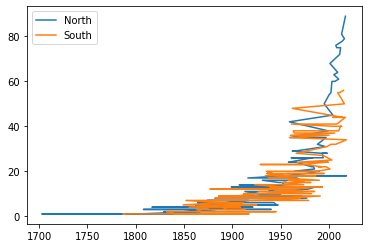

In [193]:
attacks.sort_values(by='Year', inplace=True)
ax = attacks['Year'][attacks['Hemisphere'] =='North'].value_counts().plot()
ax = attacks[attacks['Hemisphere'] =='South']['Year'].value_counts().plot()
ax.legend(['North', 'South'])

The two following plots represent the total number of attacks per month per hemisphere:

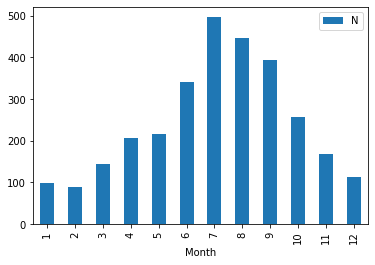

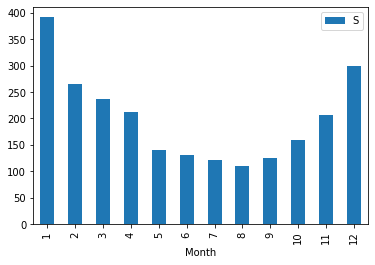

In [261]:
ax = attacks[attacks['Hemisphere']=='North'].groupby(['Month']).count().plot(kind='bar',y='Season')
ax.legend('North')
ax = attacks[attacks['Hemisphere']=='South'].groupby(['Month']).count().plot(kind='bar',y='Season')
ax.legend('South')

### Group by periods of 50 years - Seasons

**North hemisphere by season**

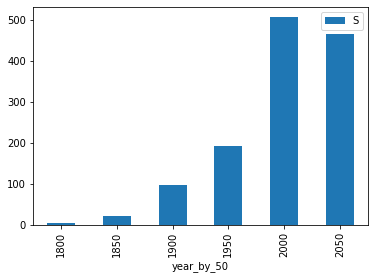

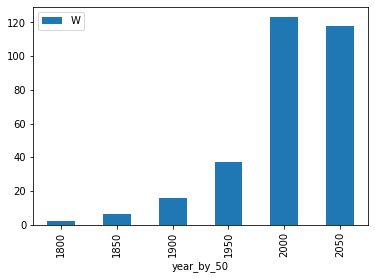

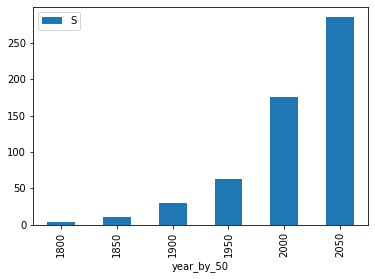

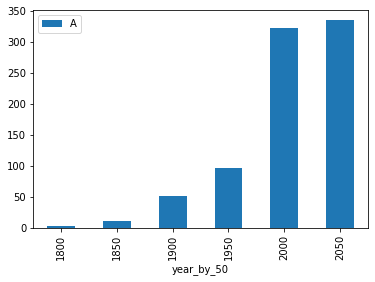

In [315]:
ax = attacks[(attacks['Season']=='Summer') & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('Summer')
ax = attacks[(attacks['Season']=='Winter') & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('Winter')
ax = attacks[(attacks['Season']=='Spring') & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('Spring')
ax = attacks[(attacks['Season']=='Autumn') & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('Autumn')

**South hemisphere by season**

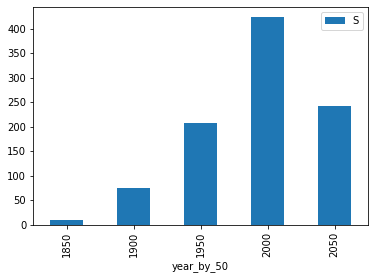

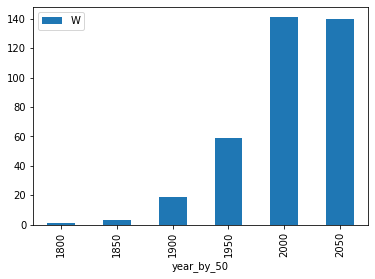

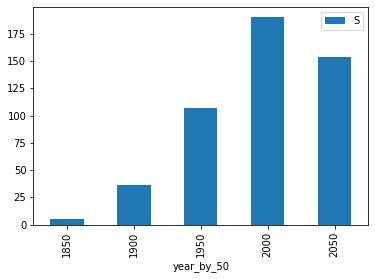

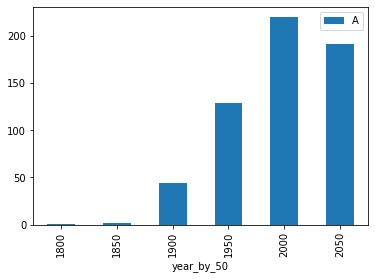

In [317]:
ax = attacks[(attacks['Season']=='Summer') & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('Summer')
ax = attacks[(attacks['Season']=='Winter') & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('Winter')
ax = attacks[(attacks['Season']=='Spring') & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('Spring')
ax = attacks[(attacks['Season']=='Autumn') & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('Autumn')

### Group by periods of 50 years - Months

**North hemisphere**

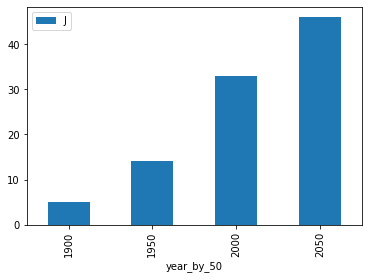

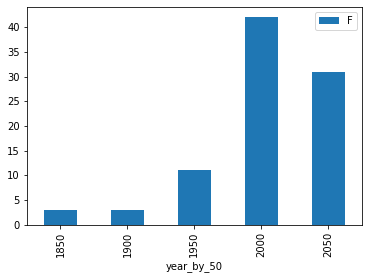

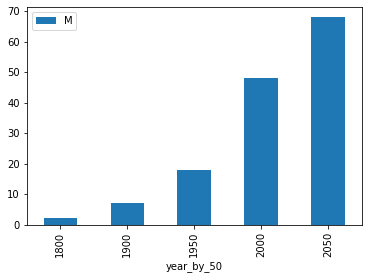

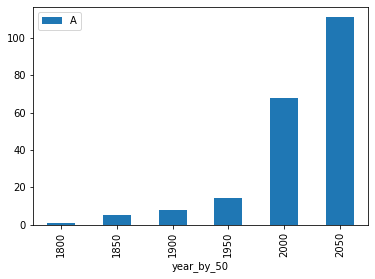

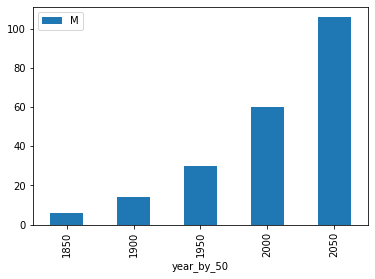

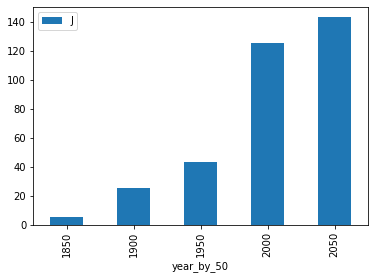

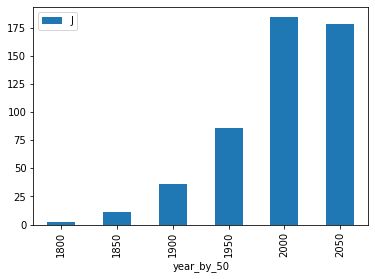

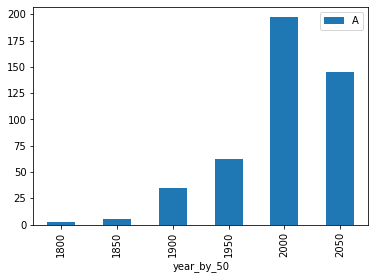

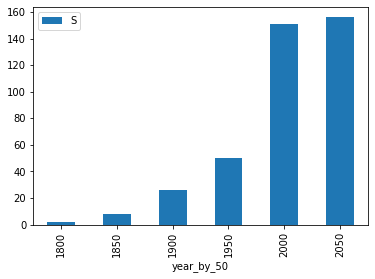

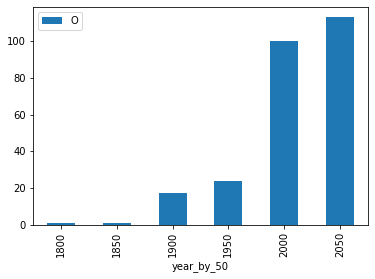

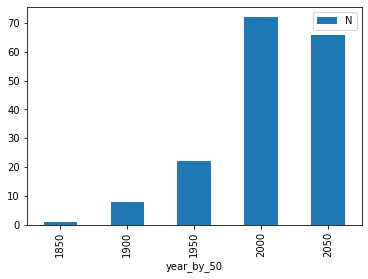

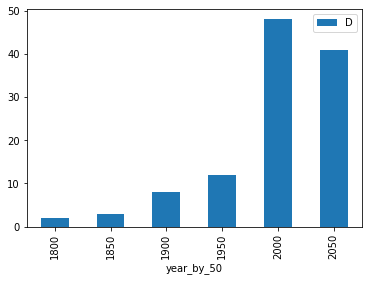

In [321]:
ax = attacks[(attacks['Month']==1) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('January')
ax = attacks[(attacks['Month']==2) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('February')
ax = attacks[(attacks['Month']==3) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('March')
ax = attacks[(attacks['Month']==4) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('April')
ax = attacks[(attacks['Month']==5) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('May')
ax = attacks[(attacks['Month']==6) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('June')
ax = attacks[(attacks['Month']==7) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('July')
ax = attacks[(attacks['Month']==8) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('August')
ax = attacks[(attacks['Month']==9) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('September')
ax = attacks[(attacks['Month']==10) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('October')
ax = attacks[(attacks['Month']==11) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('November')
ax = attacks[(attacks['Month']==12) & (attacks['Hemisphere']=='North')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('December')

**South hemisphere**

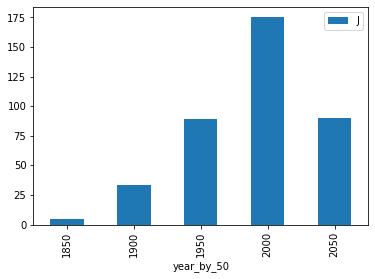

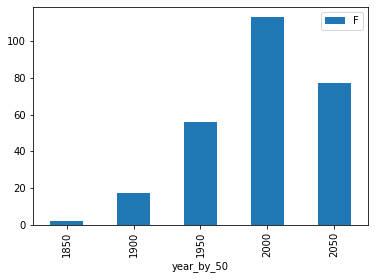

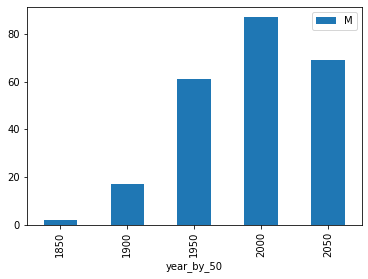

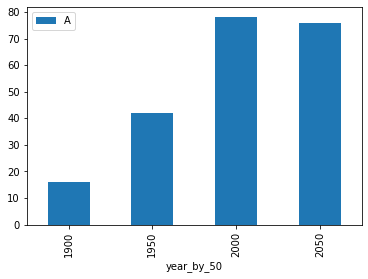

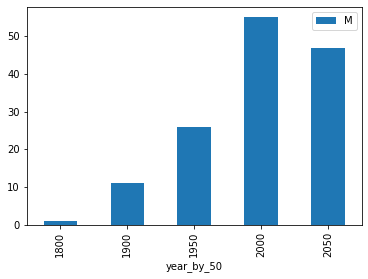

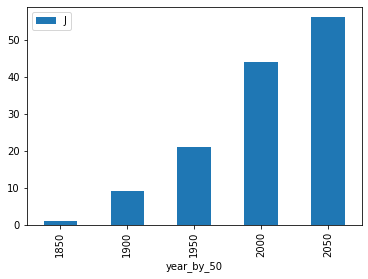

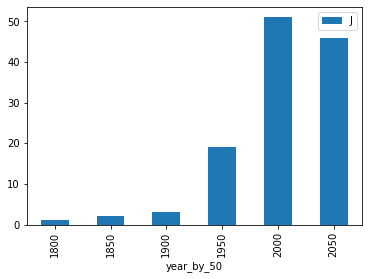

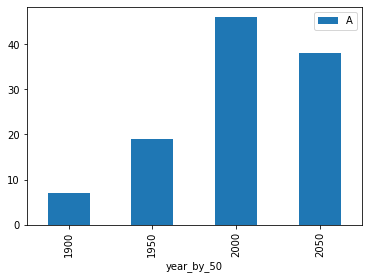

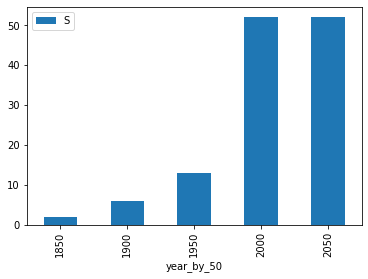

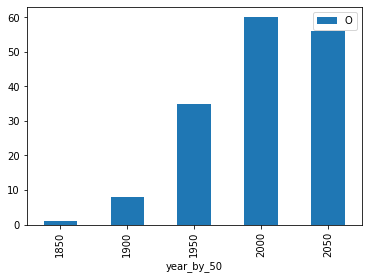

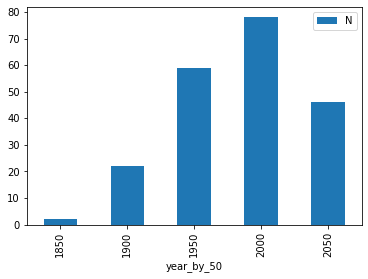

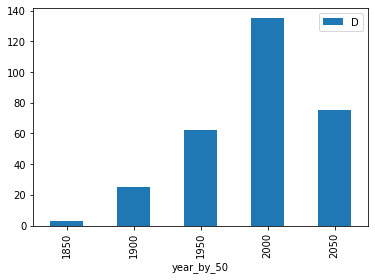

In [320]:
ax = attacks[(attacks['Month']==1) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('January')
ax = attacks[(attacks['Month']==2) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('February')
ax = attacks[(attacks['Month']==3) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('March')
ax = attacks[(attacks['Month']==4) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('April')
ax = attacks[(attacks['Month']==5) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('May')
ax = attacks[(attacks['Month']==6) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('June')
ax = attacks[(attacks['Month']==7) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('July')
ax = attacks[(attacks['Month']==8) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('August')
ax = attacks[(attacks['Month']==9) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('September')
ax = attacks[(attacks['Month']==10) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('October')
ax = attacks[(attacks['Month']==11) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('November')
ax = attacks[(attacks['Month']==12) & (attacks['Hemisphere']=='South')].groupby(['year_by_50']).count().plot(kind='bar', y='Country')
ax.legend('December')

## Conclusions

- Has the month with more attacks changed since 1700?

Checking the plots, you could think that the attacks in some of the months has decreased. However, this could be due to the selected period of 50 years. MAybe it would be better to analyze it with groups of 20 years.


- Has the season with more attacks changed since 1700?

No, summer is the season with more attacks and it doesn't matter what hemisphere you check, the behaviour is the same.

## Export final DataFrame to csv

In [318]:
attacks.to_csv('data/attacks_cleaned.csv', index=False)